<a href="https://colab.research.google.com/github/Ashoksai-tech/Time_Series_Forecasting/blob/main/Airline_Passenger_Forecasting_Using_Arima_and_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [11]:
!unzip "/content/archive (7).zip"

Archive:  /content/archive (7).zip
replace AirPassengers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AirPassengers.csv       


In [12]:
df = pd.read_csv("/content/AirPassengers.csv")

In [13]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df = df.rename(columns={'#Passengers': 'Passengers'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Change the datatype of Date and Set Index

In [15]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace = True)
df['Passengers'] = df['Passengers'].resample('MS').mean()

In [16]:
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [17]:
df.columns

Index(['Passengers'], dtype='object')

In [18]:
df['Year'] = df.index.year

<Axes: xlabel='Month'>

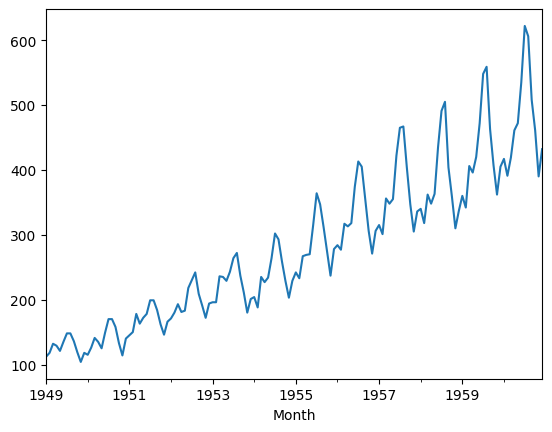

In [19]:
df['Passengers'].plot()

In [20]:
df.head()

,Passengers,Year
Month,,
1949-01-01,112.0,1949
1949-02-01,118.0,1949
1949-03-01,132.0,1949
1949-04-01,129.0,1949
1949-05-01,121.0,1949


<ipython-input-21-30ba3a0bfcad>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Passengers', ci=None)


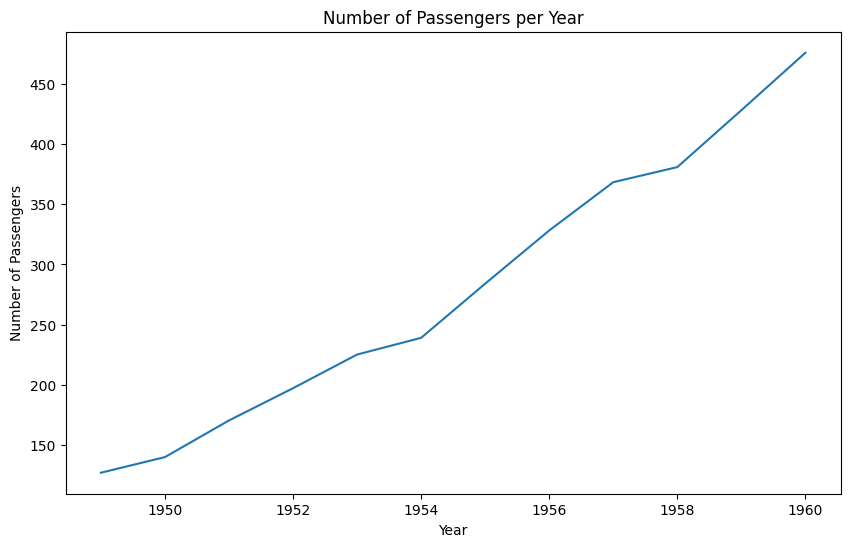

In [21]:
import seaborn as sns

# Group by Year and plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Passengers', ci=None)
plt.title('Number of Passengers per Year')
plt.ylabel('Number of Passengers')
plt.show()

# Model Decomposition

In [22]:
result = seasonal_decompose(df['Passengers'],model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64
Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01  

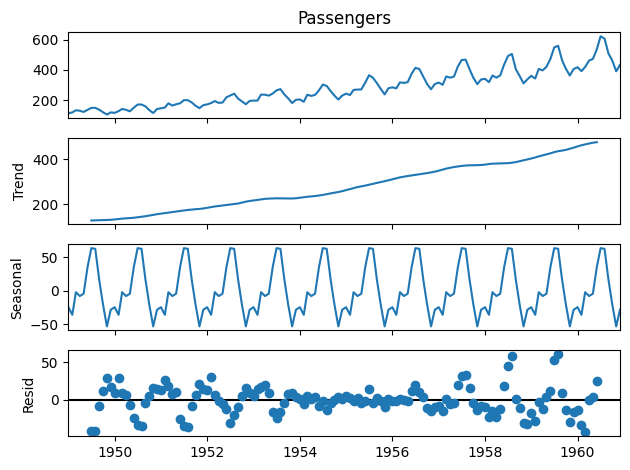

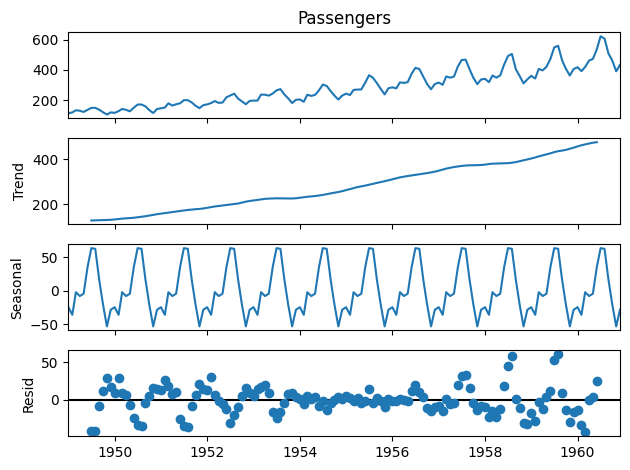

In [23]:
result.plot()

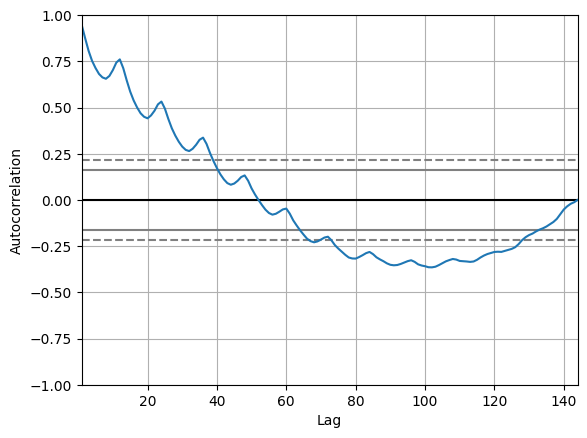

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

# Check for stationarity

* null hypothesis: Data is not stationary
* ALternative hypothesis: Data is stationary

In [27]:
data = adfuller(df['Passengers'].dropna())

print(f"ADF test stats:",data[0])
print(f"p-value:",data[1])

ADF test stats: 0.8153688792060498
p-value: 0.991880243437641


As p > 0.05 then we failed to reject null hypothesis so data is not stationary

# Apply Moving Average to Stationarise Data

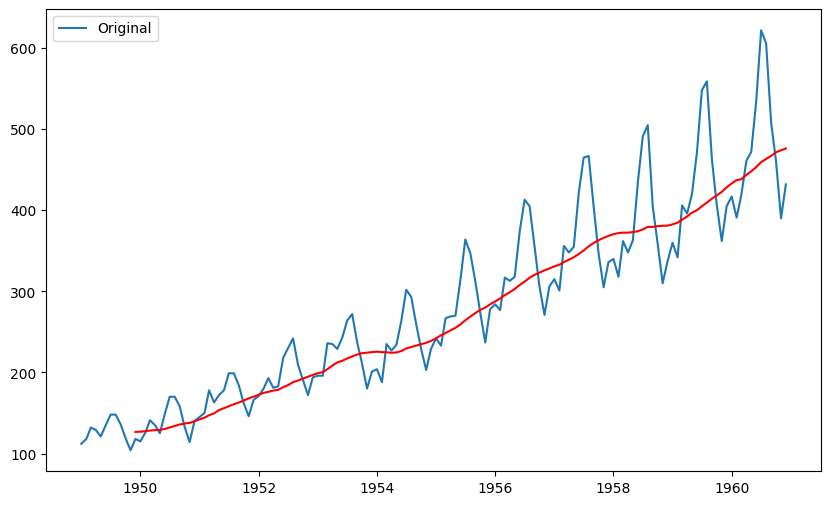

In [33]:
window=12

df['Moving_Average'] = df['Passengers'].rolling(window=window).mean()
plt.figure(figsize=(10,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Moving_Average'], color='red')
plt.legend()
plt.show()

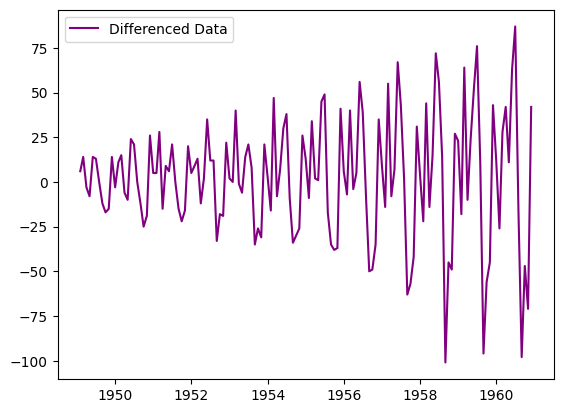

In [34]:
df['difference'] = df['Passengers'].diff()

plt.plot(df['difference'],label='Differenced Data',color='purple')
plt.legend()
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller

# ADF Test on the differenced or smoothed data
result = adfuller(df['difference'].dropna())  # or use 'EWMA' or 'Moving_Avg'

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.829267
p-value: 0.054213


In [38]:
from statsmodels.tsa.stattools import adfuller

# ADF Test on the differenced or smoothed data
result = adfuller(df['Moving_Average'].dropna())  # or use 'EWMA' or 'Moving_Avg'

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 0.873695
p-value: 0.992737


# Plot ACF and PACF plot for AR and MA

Text(0.5, 1.0, 'ACF')

<Figure size 800x600 with 0 Axes>

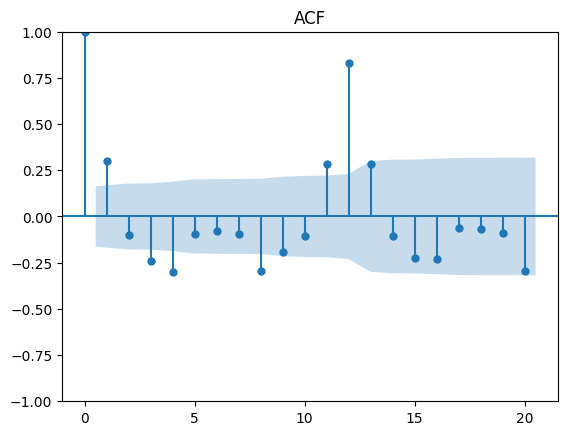

In [50]:
plt.figure(figsize=(8,6))

#ACF
plot_acf(df['difference'].dropna(),lags = 20)
plt.title('ACF')

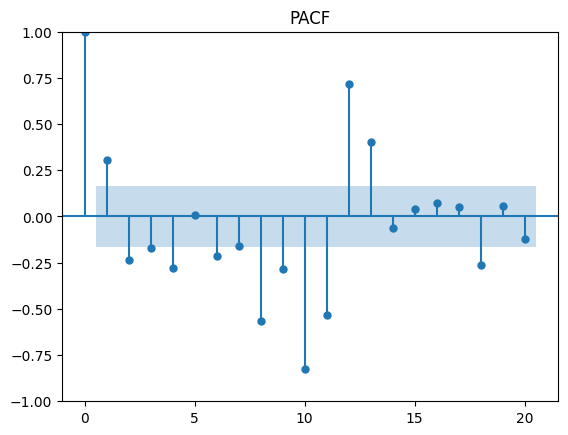

In [49]:
plot_pacf(df['difference'].dropna(),lags=20,method='ols')
plt.title('PACF')
plt.show()

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['difference'].dropna(),order = (3,1,4))
arima_result = model.fit()
print(arima_result.summary())

forecast1 = arima_result.forecast(steps = len(df))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             difference   No. Observations:                  143
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -679.698
Date:                Mon, 07 Oct 2024   AIC                           1375.396
Time:                        18:08:32   BIC                           1399.043
Sample:                    02-01-1949   HQIC                          1385.005
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7963      0.121     -6.592      0.000      -1.033      -0.560
ar.L2         -0.7776      0.105     -7.391      0.000      -0.984      -0.571
ar.L3         -0.3477      0.131     -2.650      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
predict = arima_result.predict(start=0,stop=len(df),dynamic=False)

143

In [127]:
predict

,predicted_mean
1949-02-01,0.000000
1949-03-01,5.997873
1949-04-01,12.136288
1949-05-01,-0.125436
1949-06-01,-2.267229
...,...
1960-08-01,35.103856
1960-09-01,-2.848994
1960-10-01,-73.723936
1960-11-01,-10.656078


In [128]:
len(predict)

143

In [76]:
df['difference']

,difference
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


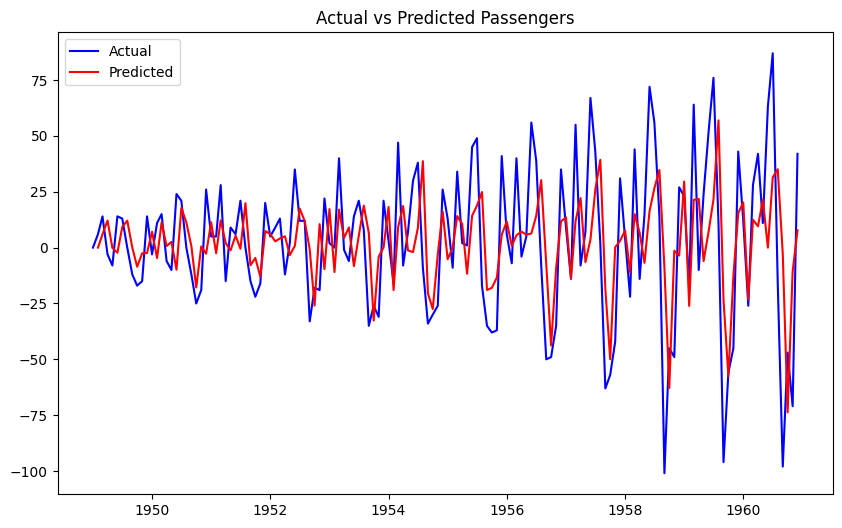

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['difference'], label='Actual', color='blue')
plt.plot(predict, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Passengers')
plt.show()


In [129]:
df['difference'].isnull().sum()

0

In [122]:
len(predict)

143

In [130]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
min_len = min(len(df['difference'].dropna()), len(predict))
mse = mean_squared_error(df['difference'].dropna()[:min_len], predict[:min_len])
print(f"Mean Squared Error: {mse}")
rmse = root_mean_squared_error(df['difference'].dropna()[:min_len], predict[:min_len])
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 578.5042815938963
Root Mean Squared Error: 24.052115948371284


In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = df['Passengers'].values.reshape(-1, 1)
scaled_data = MinMaxScaler().fit_transform(data)

X = np.array([scaled_data[i:i+12] for i in range(len(scaled_data)-12)])
y = scaled_data[12:]

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define and compile the model
model = Sequential([LSTM(100, input_shape=(12, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=75, batch_size=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0359
Epoch 2/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099
Epoch 3/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084
Epoch 4/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099
Epoch 5/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107
Epoch 6/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086
Epoch 7/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124
Epoch 8/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 9/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071
Epoch 10/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045
Epoch 11/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055
Epoch 12/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060
Epoch 13/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039
Epoch 14/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050
Epoch 15/75
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 16/75
66/66 ━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


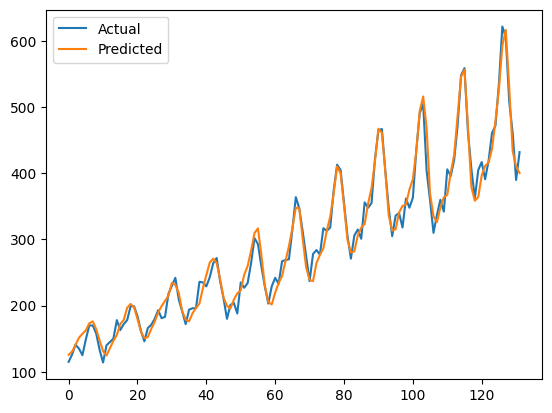

In [113]:
predictions = model.predict(X)
predictions = MinMaxScaler().fit(data).inverse_transform(predictions)

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.plot(data[12:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X)
predictions = MinMaxScaler().fit(data).inverse_transform(predictions)

rmse = np.sqrt(mean_squared_error(data[12:], predictions))
print(f'RMSE: {rmse}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 17.120632425691692
